<a href="https://colab.research.google.com/github/ufairahbashir/googlecolab/blob/main/Ufairah_Damara_Bashir_H071201091_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Citra

### 1. import library

In [ ]:
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2
import numpy as np
import os
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import image

pertama saya mengimport gambar dari gdrive saya.

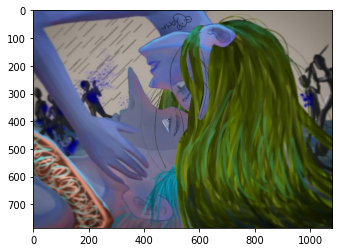

In [ ]:
image = cv2.imread('/content/drive/MyDrive/CV/PORTOFOLIO/2D/ARTWORKS/aku mengalah.jpg')
plt.imshow(image)

karena warnanya bersifat negative, maka saya menggunakan COLOR_BGR2RGB untuk mengubah warnanya kembali ke semula

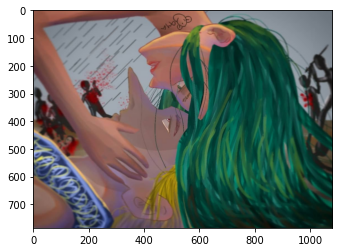

In [ ]:
image_cvtresult = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_cvtresult)

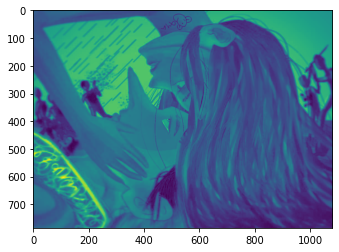

In [ ]:
r,g,b = cv2.split(image_cvtresult)
plt.imshow(b)

In [ ]:
image_array = img_to_array(image_cvtresult)
print(image_array)

[[[144.  86.  72.]
  [144.  86.  72.]
  [144.  86.  72.]
  ...
  [106. 115. 124.]
  [106. 115. 124.]
  [106. 115. 124.]]

 [[144.  86.  72.]
  [144.  86.  72.]
  [144.  86.  72.]
  ...
  [106. 115. 124.]
  [106. 115. 124.]
  [106. 115. 124.]]

 [[144.  86.  72.]
  [144.  86.  72.]
  [144.  86.  72.]
  ...
  [106. 115. 124.]
  [106. 115. 124.]
  [106. 115. 124.]]

 ...

 [[112.  85.  90.]
  [110.  85.  88.]
  [111.  84.  89.]
  ...
  [ 18.  31.  22.]
  [ 18.  31.  22.]
  [ 18.  31.  22.]]

 [[110.  88.  91.]
  [110.  88.  91.]
  [110.  88.  91.]
  ...
  [ 18.  31.  22.]
  [ 18.  31.  22.]
  [ 18.  31.  22.]]

 [[108.  92.  95.]
  [109.  93.  96.]
  [109.  93.  96.]
  ...
  [ 17.  33.  23.]
  [ 17.  33.  23.]
  [ 16.  32.  22.]]]


<function matplotlib.pyplot.show>

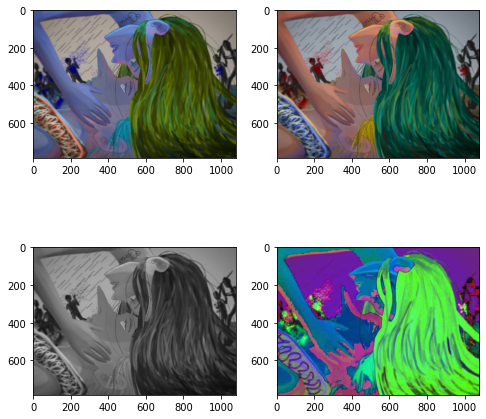

In [ ]:
fig = plt.figure(num = None, figsize=(8, 8))

image_grayscale_temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_grayscale = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)

image_hsv = cv2.cvtColor(image_cvtresult, cv2.COLOR_RGB2HSV)

ax = fig.add_subplot(2, 2, 1)
plt.imshow(image)

ax = fig.add_subplot(2, 2, 2)
plt.imshow(image_cvtresult)

ax = fig.add_subplot(2, 2, 3)
plt.imshow(image_grayscale)

ax = fig.add_subplot(2, 2, 4)
plt.imshow(image_hsv)

plt.show

<function matplotlib.pyplot.show>

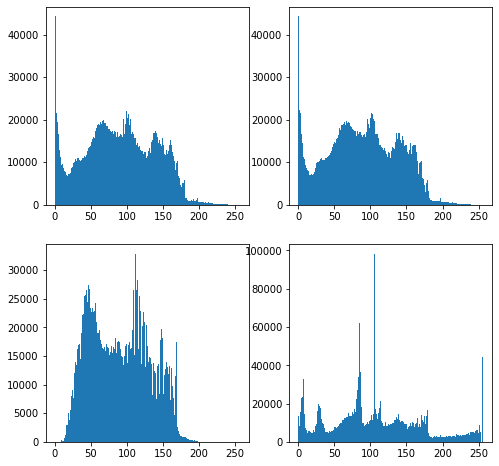

In [ ]:
fig = plt.figure(num = None, figsize=(8, 8))

image_grayscale_temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_grayscale = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)

image_hsv = cv2.cvtColor(image_cvtresult, cv2.COLOR_RGB2HSV)

ax = fig.add_subplot(2, 2, 1)
plt.hist(image.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 2)
plt.hist(image_cvtresult.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 3)
plt.hist(image_grayscale.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 4)
plt.hist(image_hsv.ravel(),256,[0,256])

plt.show

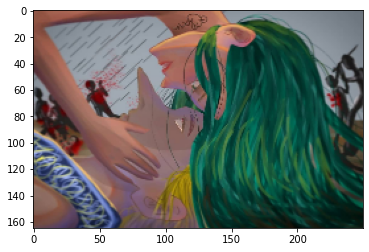

In [ ]:
image_resize = cv2.resize(image_cvtresult, (250, 165))
plt.imshow(image_resize)

In [ ]:
base_directory = '/content/'
augmented_directory = os.path.join(base_directory, "augmented_result")
os.mkdir(augmented_directory)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 45,
    width_shift_range = 0.5
)

In [ ]:
path = "/content/drive/MyDrive/CV/PORTOFOLIO/2D/ARTWORKS"
size = 150
dataset = []
image_dir = os.listdir(path)

img = io.imread(f"{path}/{image_dir[0]}")
img = Image.fromarray(img, 'RGB')
img = img.resize((size, size))
dataset.append(np.array(img))
x = np.array(dataset)

In [ ]:
i = 0
for j in datagen.flow(x, batch_size = 32,
                      save_to_dir = "/content/augmented_result/",
                      save_prefix = "aug_rslt",
                      save_format = "png"):

  i += 1
  if i > 30:
    break

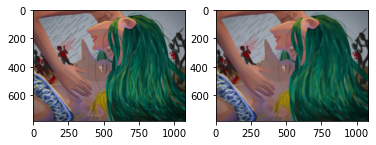

In [ ]:
image1 = cv2.GaussianBlur(image_cvtresult, (3,3), 0)
rgb_dst = cv2.fastNlMeansDenoisingColored(image1, None, 10, 10, 7, 21)

plt.subplot(121),plt.imshow(image_cvtresult)
plt.subplot(122),plt.imshow(rgb_dst)

plt.show()